<h1 style="text-align: center;">
    Parcialito 1
</h1>

<h2 style="text-align: center;">
    Teoría de Algoritmos 2
</h2>

<h2 style="text-align: center;">
    Guido Botta
</h2>

<h3 style="text-align: center;">
    Padrón 102103
</h3>


# Enunciado

**Teoría de Algoritmos II (75.30)**

**1.er Parcialito Domiciliario – 08/04/2022 - Fecha de Entrega: 29/04/2022**

Aclaraciones: Cada ejercicio dice al final del mismo la cantidad de puntos que otorga por hacerse completamente bien (en total, 10). Se deben obtener al menos 5 puntos para aprobar, y se deben aprobar al menos 3 de los parcialitos para aprobar/regularizar la cursada. Para la fecha de entregar, enviar un mail a mbuchwald@fi.uba.ar con un pdf con la resolución, con nombre P1 - PADRON.pdf. Pueden incluir todo el material adicional que les parezca relevante (desde código hasta
gráficos).

Considerando esta red que representa las conexiones de diferentes países por los vuelos (directos) realizados entre ellos, responder las siguientes preguntas. A los fines de estos ejercicios, se puede obviar la última columna del archivo csv.

1. Determinar:

  a. El diámetro de la red.
    
  b. El grado promedio de la red.

  c. El coeficiente de clustering promedio de la red.

  [1 punto]

2. Indicar si existe algún tipo de Homofilia y qué tipo de homofilia es. Si no hay homofilia por ningún criterio, explicar. Justificar detalladamente.

  [3 puntos]

3. Determinar los puentes (globales o locales) en dicha red.

  [1 punto]

4. 
  a. Determinar un tipo de centralidad que podría ser útil calcular para esta red, justificando.

  b. Realizar una representación gráfica de dicha red, considerando la centralidad de los distintos países dada por la métrica del punto a (tamaño de los nodos proporcional a dicha métrica).

  [2 puntos]

5. 
  
  a. Obtener una simulación de un modelado de Erdös-Rényi que corresponda a los parámetros de esta red.
  
  b. Obtener una simulación de un modelado de Preferential Attachment (ley de potencias) que corresponda a los
parámetros de esta red.
  
  c. Obtener una representación de anonymous walks tanto de la red original como para las dos simuladas en los puntos a y b. Determinar por distancia coseno cuál sería la simulación más afín.

  [3 puntos]

# Resolución

In [1]:
# IMPORTS
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import socialnetworksutils.metricas as snu_metrics
import socialnetworksutils.modelos as snu_models
import socialnetworksutils.homofilia as snu_homofilia
import socialnetworksutils.embeddings as snu_embeddings

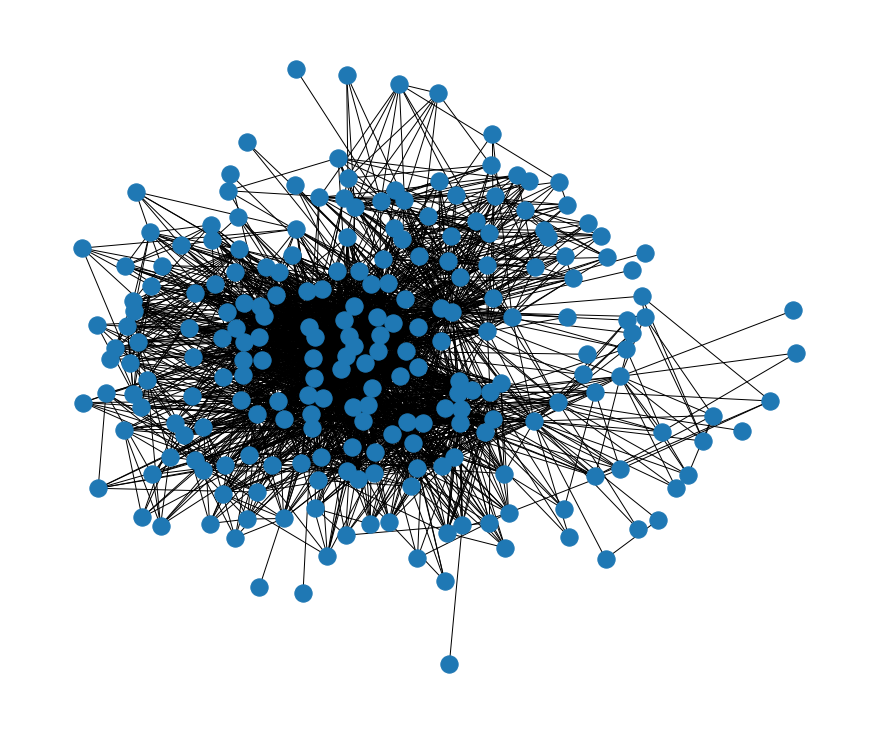

In [2]:
df = pd.read_csv("World.csv")
df = df[['Origen', 'Destino']]

plt.figure(figsize=(12,10))
grafo = nx.from_pandas_edgelist(df, source="Origen", target="Destino")
nx.draw_kamada_kawai(grafo, with_labels=False)

In [3]:
# Algunas estadísticas del dataset
print("Unicos en dataframe: ", len(pd.concat([df['Origen'], df['Destino']]).unique()))
print("Nodos en grafo: ", len(grafo)) # Para verificar, quiero que coincidan
df.describe()

Unicos en dataframe:  229
Nodos en grafo:  229


,Origen,Destino
count,2852,2852
unique,208,220
top,United Kingdom,United States
freq,103,104


## Ejercicio 1

Determinar:

  a. El diámetro de la red.
    
  b. El grado promedio de la red.

  c. El coeficiente de clustering promedio de la red.

#### Diámetro de la Red

El diámetro es el largo máximo de todos los caminos mínimos.

El diámetro de este grafo es de 5. Aún teniendo 229 nodos, el diámetro es bastante pequeño, característica que suele estar en redes sociales.

In [4]:
diametro = nx.diameter(grafo)
print(f"diametro: {diametro}")

diametro: 5


#### Grado Promedio de la Red

El grado de un vértice es el número de aristas incidentes al vértice.

En este caso, el grado promedio de la red es de 24.9

In [5]:
grado_promedio = snu_metrics.grado_promedio(grafo)
print(f"grado_promedio: {grado_promedio}")

grado_promedio: 24.90829694323144


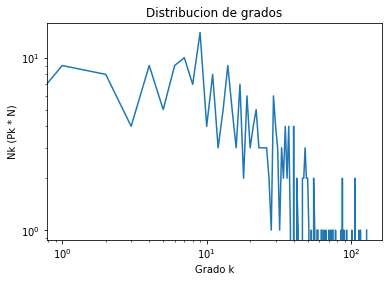

In [6]:
distribucion_grados = snu_metrics.distribucion_grados(grafo)
rango = np.arange(len(distribucion_grados))
plt.plot(rango, distribucion_grados)
plt.xlabel("Grado k")
plt.ylabel("Nk (Pk * N)")
plt.xscale("log")
plt.yscale("log")
plt.title("Distribucion de grados")
plt.show()

#### Clustering Promedio de la Red

Dado un vértice A, el coeficiente de clustering es la probabilidad de que dos vértices adyacentes de A sean adyacentes entre sí. Este valor mide la proporción de los vecinos de A que están conectados.

$$
C_i = \frac{2e_i}{k_i(k_i-1)}
$$

$$
C = \frac{1}{N}\sum_i C_i
$$

Con $e_i$ la cantidad de aristas que unen vecinos de $i$. Si el grafo es dirigido no va el 2, y se cuentan ambas apariciones por separado.

En general, el coeficiente de clustering promedio de una red social suele ser alto.

En este caso, el grafo es no dirigido y el coeficiente de clustering promedio de la red es de 0.66, el cual es un valor alto.

In [7]:
# SOLUCION 1
N = len(grafo)
clustering_total = 0

for v in grafo:
    clustering_total += snu_metrics.coeficiente_clustering(grafo, v)
    
clustering_promedio = clustering_total / N
print(f"clustering_total: {clustering_total}\nclustering_promedio: {clustering_promedio}")

clustering_total: 151.17584687818797
clustering_promedio: 0.6601565365859736


In [8]:
# SOLUCION 2
N = len(grafo)
clustering_total = 0

for ci in nx.clustering(grafo).values():
    clustering_total += ci
    
clustering_promedio = clustering_total / N
print(f"clustering_total: {clustering_total}\nclustering_promedio: {clustering_promedio}")

clustering_total: 151.17584687818797
clustering_promedio: 0.6601565365859736


In [9]:
# SOLUCION 3
print(f"clustering_promedio: {nx.average_clustering(grafo)}")

clustering_promedio: 0.6601565365859736


## Ejercicio 2

Indicar si existe algún tipo de Homofilia y qué tipo de homofilia es. Si no hay homofilia por ningún criterio, explicar. Justificar detalladamente.

Se realizará análisis de homofilia para dos casos:

1. Países por poderío económico. Para esto se considerará el PBI (GDP) en dolares en el 2010. Se eligió este año porque era el que más datos tenía en el set de datos utilizado. Se dividirá en dos grupos, uno por debajo de la mediana y otro para mayor o igual a la mediana. Para los casos donde no se tiene datos se considerará un PBI de 0, el cual quedará por debajo de la mediana. Se tomó esta decisión ya que los territorios que quedaban sin datos eran territorios chicos en los que muy probablemente quedasen por debajo aún con los datos correctos. Se utilizó esta división para realizar un análisis de un caso binario.

2. Países por continente. En este caso se encontró un set de datos con información para todos los países. Se utilizó este caso para realizar un análisis de un caso no binario.

#### Primer Caso: Por PBI

In [10]:
# Armado del df

unique_countries = pd.DataFrame(pd.concat([df['Origen'], df['Destino']]).unique(), columns=['Country Name'])
df_pbi = pd.read_csv("PBI.csv")
df_pbi_filtered = df_pbi[['Country Name', '2010']].loc[(df_pbi['Country Name'].isin(unique_countries['Country Name']))].dropna()

# Pierdo 31 paises, que van a ser seteados a cero. 2010 es el año con menor pérdida
lost = unique_countries.loc[~unique_countries['Country Name'].isin(df_pbi_filtered['Country Name'])].loc[:]
lost['2010'] = 0

print("Paises perdidos: ", len(lost))

df_pbi_complete = pd.concat([df_pbi_filtered, lost])

print("Mediana: ", df_pbi_filtered['2010'].median())
print("Media: ", df_pbi_filtered['2010'].mean())

Paises perdidos:  31
Mediana:  25722851997.836502
Media:  333149417034.75037


In [11]:
median = df_pbi_filtered['2010'].median()
low_median = df_pbi_complete.loc[df_pbi_complete['2010'] < median]
high_median = df_pbi_complete.loc[df_pbi_complete['2010'] >= median]

print(f"Cantidad de países con PBI menor a la mediana: {len(low_median)}")
print(f"Cantidad de países con PBI mayor o igual a la mediana: {len(high_median)}")

prop_menor = len(low_median) / (len(low_median) + len(high_median))
prop_mayor = len(high_median) / (len(low_median) + len(high_median))
dict_mapper = dict(zip(df_pbi_complete['Country Name'], df_pbi_complete['2010']))
mapper = (lambda k: "Bajo" if dict_mapper[k] < median else "Alto")
print()
print(f"Proporcion de menor: {prop_menor}")
print(f"Proporcion de mayor o igual: {prop_mayor}")
print(f"Proporcion por herramienta: {snu_homofilia.proporcion_por_tipo(grafo, mapper)}")
print()
print(f"Probabilidad de cruce menor-menor (p**2): {prop_menor**2}")
print(f"Probabilidad de cruce mayor-mayor (q**2): {prop_mayor**2}")
print(f"Probabilidad de cruce mayor-menor (2*p*q): {2*prop_mayor*prop_menor}")
print()
print(f"Cantidad de aristas: {snu_homofilia.contar_aristas(grafo)}")
print(f"Proporcion de cruce de campo real: {snu_homofilia.proporcion_cruzan_campo(grafo, mapper)}")
print()
print(f"Cruzan campo por tipo bajo: {snu_homofilia.proporcion_cruzan_campo_de_tipo(grafo, 'Bajo', mapper)}")
print(f"Cruzan campo por tipo alto: {snu_homofilia.proporcion_cruzan_campo_de_tipo(grafo, 'Alto', mapper)}")

Cantidad de países con PBI menor a la mediana: 130
Cantidad de países con PBI mayor o igual a la mediana: 99

Proporcion de menor: 0.5676855895196506
Proporcion de mayor o igual: 0.43231441048034935
Proporcion por herramienta: {'Bajo': 0.5676855895196506, 'Alto': 0.43231441048034935}

Probabilidad de cruce menor-menor (p**2): 0.32226692854827327
Probabilidad de cruce mayor-mayor (q**2): 0.186895749508972
Probabilidad de cruce mayor-menor (2*p*q): 0.4908373219427547

Cantidad de aristas: 2852
Proporcion de cruce de campo real: 0.3394109396914446

Cruzan campo por tipo bajo: 0.6914285714285714
Cruzan campo por tipo alto: 0.22490706319702602


- Proporción de aristas que cruzan teórica: 0.49
- Proporción de aristas que cruzan real: 0.34

Se puede observar que la fracción de aristas real que cruzan de campo es menor que la esperada. Hay un 69% de "sin homofilia". Por lo que puede intuirse que existe homofilia.

También es interesante analizar el cruce por tipo, con una fracción de 0.69 para los países de menor PBI y 0.22 para los de mayor PBI. Esto se podría interpretar como que los de bajo PBI requieren de realizar cruces con los países de alto PBI para lograr una conectividad a nivel mundial, mientras que los de alto PBI no tienen dicha necesidad, por lo que hay una menor proporción de cruces.

#### Segundo Caso: Por Continente

In [12]:
df_cont = pd.read_csv("Continents.csv", sep=";")[['Country Name', 'Continent']]
lost = unique_countries.loc[~unique_countries['Country Name'].isin(df_cont['Country Name'])].loc[:]
print("Paises perdidos: ", len(lost))

Paises perdidos:  0


In [13]:
dict_mapper = dict(zip(df_cont['Country Name'], df_cont['Continent']))
mapper = (lambda k: dict_mapper[k])

proporcion_por_tipo = snu_homofilia.proporcion_por_tipo(grafo, mapper)
print(f"Proporción por tipo: {proporcion_por_tipo}")
print()

cruces = []
for tipo in proporcion_por_tipo:
    cruces.append(proporcion_por_tipo[tipo]**2)
    print(f"Proporción de cruce por tipo {tipo} (p_i**2): {cruces[-1]}")
    
    
proporcion_cruce_teorico = 1 - sum(cruces)
proporcion_cruce_real = snu_homofilia.proporcion_cruzan_campo(grafo, mapper)
print()
print(f"Proporcion de cruce de campo teorico: {proporcion_cruce_teorico}")
print(f"Proporción de cruce de campo real: {proporcion_cruce_real}")
print(f"Probabilidad de 'No Homofilia': {proporcion_cruce_real / proporcion_cruce_teorico}")

Proporción por tipo: {'Oceania': 0.1091703056768559, 'Asia': 0.22270742358078602, 'North America': 0.1572052401746725, 'Europe': 0.20087336244541484, 'South America': 0.0611353711790393, 'Africa': 0.24890829694323144}

Proporción de cruce por tipo Oceania (p_i**2): 0.011918155641578155
Proporción de cruce por tipo Asia (p_i**2): 0.049598596517991644
Proporción de cruce por tipo North America (p_i**2): 0.024713487538376464
Proporción de cruce por tipo Europe (p_i**2): 0.040350107740127
Proporción de cruce por tipo South America (p_i**2): 0.0037375336091989087
Proporción de cruce por tipo Africa (p_i**2): 0.061955340287179875

Proporcion de cruce de campo teorico: 0.807726778665548
Proporción de cruce de campo real: 0.43688639551192143
Probabilidad de 'No Homofilia': 0.5408838818414625


- Proporción de aristas que cruzan teórica: 0.81
- Proporción de aristas que cruzan real: 0.44

Se puede observar que la fracción de aristas real que cruzan de campo es menor que la esperada. Hay un 54% de "sin homofilia". Por lo que se podría decir con mayor seguridad que el caso anterior que sí existe homofilia por continente.

## Ejercicio 3

Determinar los puentes (globales o locales) en dicha red.

Un puente global es una arista sin la cual el grafo no es conexo.

Un puente local es una arista que une dos vértices sin adyacentes en común.

Aprovechando networkx, podemos ver cuánto es la longitud del camino mínimo que une a los vértices que eran unidos por dicho puente local. En el caso de ser un puente global, el valor de la longitud es infinito, ya que no hay manera de conectar dichos nodos.

Los puentes locales son:

- Papua New Guinea - Micronesia, con una longitud de 3
- Micronesia, Marshall Islands, con una longitud de 3

Además, existen 9 puentes globales (que también son locales)

- Fiji, Tuvalu
- United States, American Samoa
- United Kingdom, Saint Helena
- Canada, Saint Pierre and Miquelon
- Antigua and Barbuda, Montserrat
- New Zealand, Niue
- South Africa, Lesotho
- South Africa, Swaziland
- Burma, Myanmar

In [14]:
# Puentes locales
puentes_locales = list(nx.local_bridges(grafo))
print(f"Cantidad de puentes locales: {len(puentes_locales)}\n")

for v1, v2, s in puentes_locales:
    print(f"{v1} - {v2}. Longitud camino mínimo: {s}")

Cantidad de puentes locales: 11

Papua New Guinea - Micronesia. Longitud camino mínimo: 3
Fiji - Tuvalu. Longitud camino mínimo: inf
Micronesia - Marshall Islands. Longitud camino mínimo: 3
United States - American Samoa. Longitud camino mínimo: inf
United Kingdom - Saint Helena. Longitud camino mínimo: inf
Canada - Saint Pierre and Miquelon. Longitud camino mínimo: inf
Antigua and Barbuda - Montserrat. Longitud camino mínimo: inf
New Zealand - Niue. Longitud camino mínimo: inf
South Africa - Lesotho. Longitud camino mínimo: inf
South Africa - Swaziland. Longitud camino mínimo: inf
Burma - Myanmar. Longitud camino mínimo: inf


In [15]:
# Puentes globales
puentes_globales = list(nx.bridges(grafo))
print(f"Cantidad de puentes globales: {len(puentes_globales)}\n")

for v1, v2 in puentes_globales:
    print(f"{v1} - {v2}")

Cantidad de puentes globales: 9

Fiji - Tuvalu
United States - American Samoa
United Kingdom - Saint Helena
Canada - Saint Pierre and Miquelon
Antigua and Barbuda - Montserrat
New Zealand - Niue
South Africa - Lesotho
South Africa - Swaziland
Burma - Myanmar


## Ejercicio 4

  a. Determinar un tipo de centralidad que podría ser útil calcular para esta red, justificando.

  b. Realizar una representación gráfica de dicha red, considerando la centralidad de los distintos países dada por la métrica del punto a (tamaño de los nodos proporcional a dicha métrica).

Hay tres tipos de centralidad que parecen interesantes para analizar:

1. Degree Centrality: mide el grado de los nodos. Nos indica de cuántos a cuántos países podemos ir o desde cuántos podemos llegar.
2. Eigenvector Centrality: mide la influencia de cada vértice en la red.
3. Betweenness Centrality: mide la cantidad de veces que un vértice aparece como intermediario en algún camino mínimo (donde no sea origen ni destino).

Se realizará un top 15 de cada uno de estas centralidades mencionadas. Para la representación gráfica de la red, se utilizará betweeness centrality únicamente, dado que parece interesante analizar países que puedan hacer de intermediario para viajar entre distintas partes del mundo.

#### Degree centrality

In [16]:
print("Top 15 - Degree Centrality -\n")
degree_centrality = nx.degree_centrality(grafo)
sorted([(x, degree_centrality[x]) for x in degree_centrality], key=lambda x: -x[1])[:15]

Top 15 - Degree Centrality -



[('France', 0.5614035087719298),
 ('Turkey', 0.5087719298245614),
 ('United Kingdom', 0.4956140350877193),
 ('United States', 0.4649122807017544),
 ('Germany', 0.4649122807017544),
 ('United Arab Emirates', 0.44298245614035087),
 ('Netherlands', 0.40789473684210525),
 ('Spain', 0.39035087719298245),
 ('Belgium', 0.381578947368421),
 ('Qatar', 0.381578947368421),
 ('Italy', 0.37280701754385964),
 ('Russia', 0.3421052631578947),
 ('China', 0.3289473684210526),
 ('Switzerland', 0.32456140350877194),
 ('Canada', 0.3157894736842105)]

#### Eigenvector Centrality

In [17]:
print("Top 15 - Eigenvector Centrality -\n")
eigenvector_centrality = nx.eigenvector_centrality(grafo)
sorted([(x, eigenvector_centrality[x]) for x in degree_centrality], key=lambda x: -x[1])[:15]

Top 15 - Eigenvector Centrality -



[('France', 0.19018754154739337),
 ('Turkey', 0.18739020600860878),
 ('United Kingdom', 0.18446344358180516),
 ('Germany', 0.18198060358598672),
 ('United Arab Emirates', 0.17288688625708143),
 ('Italy', 0.16619628005028209),
 ('Netherlands', 0.1657755232139752),
 ('Qatar', 0.15967493902671367),
 ('Belgium', 0.15782891658543186),
 ('Spain', 0.15692534474244815),
 ('Russia', 0.15387191683377613),
 ('Switzerland', 0.15140957305083133),
 ('United States', 0.1463194563964211),
 ('Austria', 0.14433313710033255),
 ('China', 0.13459600003712485)]

#### Betweenness Centrality

In [18]:
print("Top 15 - Betweenness Centrality -\n")
betweenness_centrality =  nx.betweenness_centrality(grafo)
sorted([(x, betweenness_centrality[x]) for x in degree_centrality], key=lambda x: -x[1])[:15]

Top 15 - Betweenness Centrality -



[('United States', 0.15312826033467095),
 ('France', 0.1066582564383836),
 ('United Kingdom', 0.07949572806991673),
 ('Australia', 0.05396712680185675),
 ('Turkey', 0.05290943296892291),
 ('United Arab Emirates', 0.04606573709425318),
 ('Canada', 0.04502321245880298),
 ('Spain', 0.03799772341776959),
 ('Germany', 0.03793083275314773),
 ('Ethiopia', 0.03421749836748116),
 ('Netherlands', 0.03277211291345285),
 ('South Africa', 0.03151538021435897),
 ('Qatar', 0.029936904969256453),
 ('China', 0.029591274905900435),
 ('Belgium', 0.0255336820467668)]

Se pueden observar cómo ciertos países como Francia, Reino Unido, Estados Unidos, Alemania, Emiratos Arabes Unidos, Países Bajos, Turquía, España, China, Bélgica y Catar aparecen en los 3 casos. Probablemente sean países muy relevantes en lo que respecta a las conexiones aereas.

#### Representación Gráfica de Betweenness Centrality

<img src="TP_Bet_Cen.png" alt="drawing" width="700"/>

## Ejercicio 5 
  
  a. Obtener una simulación de un modelado de Erdös-Rényi que corresponda a los parámetros de esta red.
  
  b. Obtener una simulación de un modelado de Preferential Attachment (ley de potencias) que corresponda a los
parámetros de esta red.
  
  c. Obtener una representación de anonymous walks tanto de la red original como para las dos simuladas en los puntos a y b. Determinar por distancia coseno cuál sería la simulación más afín.

#### Erdös-Rényi

Se analizarán dos casos para Erdös-Rényi:

1. En el primer caso se simulará con networkx, tomando p=C, lo que dará un buen coeficiente de clustering pero se desviará de otras métricas.
2. En el segundo caso se utilizará el grado promedio para simular, lo que dará un mejor grado promedio en el modelo, pero se desviará de otras métricas.

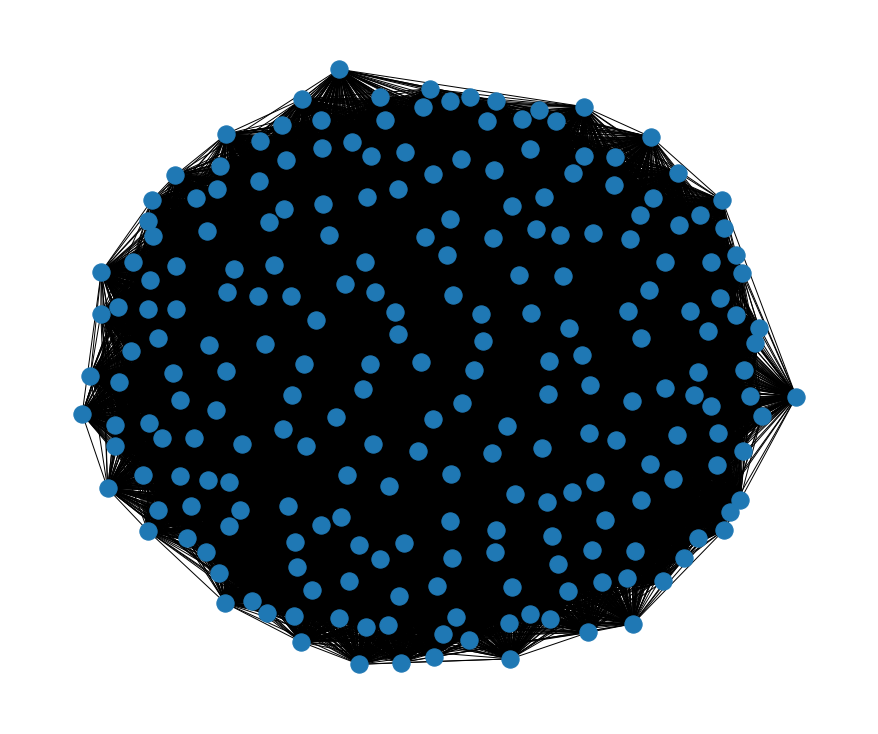

In [19]:
# Caso 1

n = len(grafo)
p = nx.average_clustering(grafo)
seed = 20160

plt.figure(figsize=(12,10))
erdos_renyi_1 = nx.erdos_renyi_graph(n, p, seed=seed)
nx.draw_kamada_kawai(erdos_renyi_1, with_labels=False)

In [20]:
# Análisis Erdos Renyi 1

diametro = nx.diameter(erdos_renyi_1)
print(f"Diametro: {diametro}")
grado_promedio = snu_metrics.grado_promedio(erdos_renyi_1)
print(f"Grado Promedio: {grado_promedio}")
clutering_promedio = nx.average_clustering(erdos_renyi_1)
print(f"Clutering Promedio: {clutering_promedio}")

Diametro: 2
Grado Promedio: 149.17903930131004
Clutering Promedio: 0.6540491639107032


In [21]:
# Análisis para Erdos Renyi 1

_,b1 = snu_embeddings.anoymous_walks(grafo, 8)
_,b2 = snu_embeddings.anoymous_walks(erdos_renyi_1, 8)
distancia_coseno = snu_metrics.distancia_coseno(b1, b2)
print(f"Distancia Coseno: {distancia_coseno}")

Distancia Coseno: 0.0048352420662358675


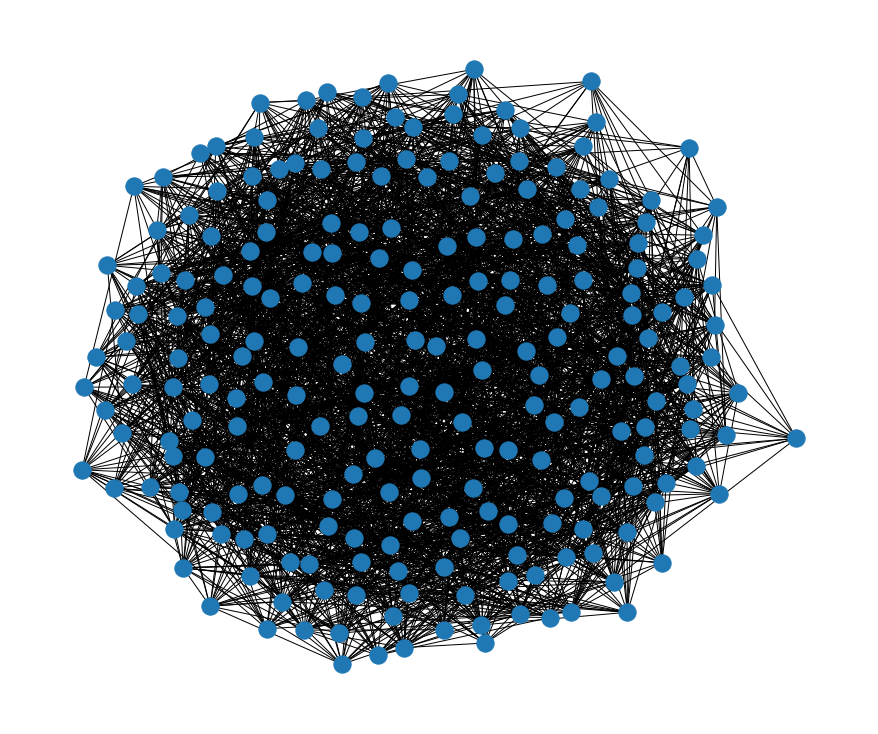

In [22]:
# Caso 2

n = len(grafo)
k = snu_metrics.grado_promedio(grafo)

plt.figure(figsize=(12,10))
erdos_renyi_2 = snu_models.erdos_renyi(n,k)
nx.draw_kamada_kawai(erdos_renyi_2, with_labels=False)

In [23]:
# Análisis Erdos Renyi 2

diametro = nx.diameter(erdos_renyi_2)
print(f"Diametro: {diametro}")
grado_promedio = snu_metrics.grado_promedio(erdos_renyi_2)
print(f"Grado Promedio: {grado_promedio}")
clutering_promedio = nx.average_clustering(erdos_renyi_2)
print(f"Clutering Promedio: {clutering_promedio}")

Diametro: 3
Grado Promedio: 24.978165938864628
Clutering Promedio: 0.1118010903317293


In [24]:
# Análisis para Erdos Renyi 2

_,b1 = snu_embeddings.anoymous_walks(grafo, 8)
_,b2 = snu_embeddings.anoymous_walks(erdos_renyi_2, 8)
distancia_coseno = snu_metrics.distancia_coseno(b1, b2)
print(f"Distancia Coseno: {distancia_coseno}")

Distancia Coseno: 0.0006159808171819492


#### Preferential Attachment

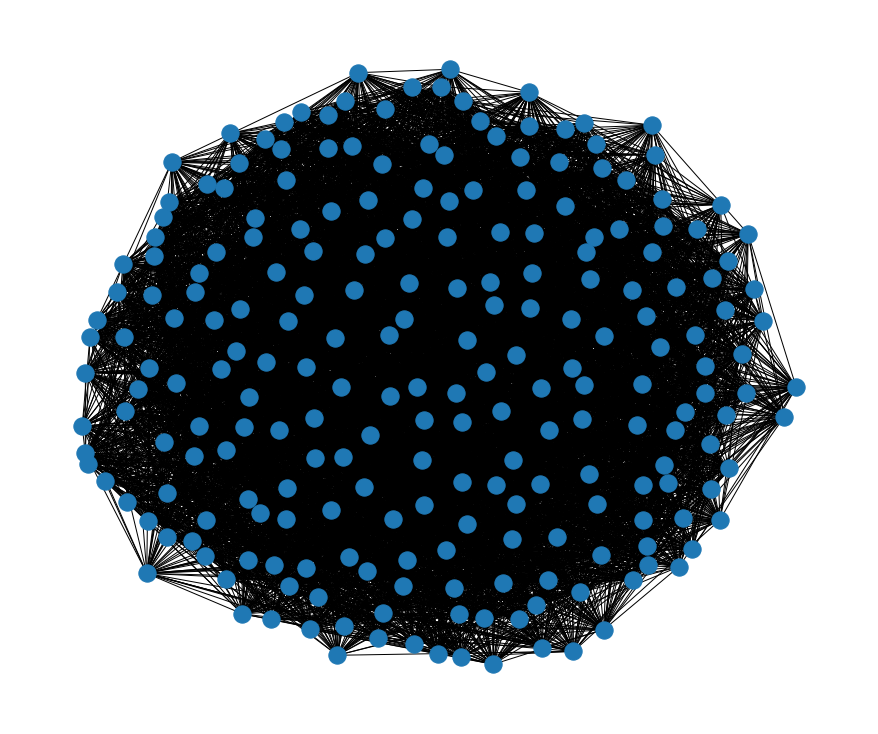

In [25]:
n = len(grafo)
a = snu_metrics.alfa_preferential_attachment(grafo, 10)
k = snu_metrics.grado_promedio(grafo)

plt.figure(figsize=(12,10))
preferential_attachment = snu_models.preferential_attachment(False, a, n, k)
nx.draw_kamada_kawai(preferential_attachment, with_labels=False)

In [26]:
# Análisis preferential attachment

diametro = nx.diameter(preferential_attachment)
print(f"Diametro: {diametro}")
grado_promedio = snu_metrics.grado_promedio(preferential_attachment)
print(f"Grado Promedio: {grado_promedio}")
clutering_promedio = nx.average_clustering(preferential_attachment)
print(f"Clutering Promedio: {clutering_promedio}")

Diametro: 2
Grado Promedio: 55.109170305676855
Clutering Promedio: 0.24169251987234608


In [27]:
# Análisis para preferential attachment

_,b1 = snu_embeddings.anoymous_walks(grafo, 8)
_,b2 = snu_embeddings.anoymous_walks(preferential_attachment, 8)
distancia_coseno = snu_metrics.distancia_coseno(b1, b2)
print(f"Distancia Coseno: {distancia_coseno}")

Distancia Coseno: 0.0026470662034772108


#### Análisis de Modelos

|  | Original | Erdös-Rényi 1 | Erdös-Rényi 2 | Preferential Attachment |
|---|---|---|---|---|
| Diámetro | 5 | 2 | 3 | 2 |
| Grado Promedio | 25 | 149 | 25 | 55 |
| Coeficiente de Clustering | 0.66 | 0.65 | 0.11 | 0.24 |
| Distancia Coseno | 0 | 0.0049 | 0.00064 | 0.0027 |

Ninguno de los modelos se adapta bien a todas las métricas del grafo original.

- La primera simulación de Erdos-Renyi se aleja mucho en diámetro y grafo promedio.
- La segunda simulación de Erdos-Renyi se aleja mucho en coeficiente de clustering.
- La simulación de Preferential Attachment se aleja mucho en diámetro, grado promedio y coeficiente de clustering.

Puede que la simulación de Preferential Attachment haya sido mal realizada, ya que era de la que mejor resultados se esperaba. Pero, con estos resultados y mirando la distancia coseno, se puede indicar que el mejor modelo fue el de Erdos-Renyi utilizando el grado promedio de entrada.